In [1]:
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import cross_val_score

In [2]:
X, y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1, noise=20, random_state=13)

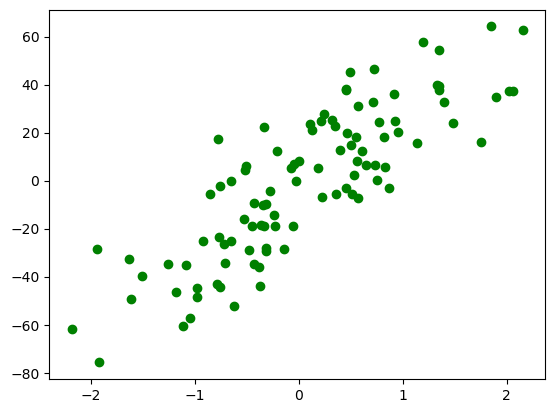

In [3]:
plt.scatter(X,y, color='green')

In [44]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

In [45]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, y_train)
print(lr.coef_)
print(lr.intercept_)

[28.12597332]
-2.271014426178382


In [46]:
y_pred = lr.predict(X_test)

In [47]:
np.mean(cross_val_score(lr, X,y, scoring='r2', cv=10))

0.6375011587464419

In [48]:
class GDRegressor:
    def __init__(self, learning_rate, epochs):
        self.m= 100
        self.b= -120
        self.lr=learning_rate
        self.epochs=epochs
        
    def fit(self, X_train, y_train):
        #calculating b using GD
        for i in range(self.epochs):
            loss_slope_b = -2 * np.sum( y - self.m*X.ravel() - self.b)
            loss_slope_m = -2 * np.sum(( y - self.m*X.ravel() - self.b)*X.ravel())
                
            self.b=self.b - (self.lr* loss_slope_b)
            self.m=self.m - (self.lr* loss_slope_m)
                
                #print(loss_slope, self.b)
        print(self.m, self.b)
        
    def predict(self, X_test):
        return self.m*X + self.b

In [49]:
gd= GDRegressor(0.001, 50)

In [50]:
gd.fit(X_train,y_train)

27.837060471820052 -2.2991839308293196


In [51]:
y_pred = gd.predict(X_test)


In [52]:
y_pred

array([[-22.13004587],
       [-14.46803398],
       [-14.93031641],
       [ 24.22481941],
       [  4.3220791 ],
       [ 21.67440917],
       [ -9.07267152],
       [  2.84916767],
       [-22.36969544],
       [-14.266255  ],
       [ 53.79864004],
       [  8.75884689],
       [  3.48535872],
       [ -8.76923699],
       [-23.69550079],
       [ 10.31541979],
       [ 15.51330493],
       [  7.70913832],
       [-47.25904197],
       [ 46.39456556],
       [-24.26231913],
       [-16.55078722],
       [-28.14130775],
       [ 57.56115677],
       [ -8.07119002],
       [-47.92672634],
       [-11.72532075],
       [-11.26615965],
       [-15.69914914],
       [-16.86253782],
       [ 17.79820103],
       [ 19.02152826],
       [ 10.32439521],
       [-37.41858492],
       [-63.18204405],
       [-35.29775901],
       [  3.75403106],
       [ 34.73292872],
       [-32.56312362],
       [ 13.35252918],
       [-44.41234489],
       [ -2.36568738],
       [-10.04163129],
       [ 10

In [53]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

ValueError: Found input variables with inconsistent numbers of samples: [20, 100]